<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# Занятие 2. Визуальный анализ данных
## Практическое задание. Визуальный анализ данных пассажиров "Титаника". Решение

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [1]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


**Считываем обучающую выборку.**

In [2]:
train_df = pd.read_csv("../../data/titanic_train.csv", 
                       index_col='PassengerId') 

In [3]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Kelly, Miss. Anna Katherine ""Annie Kate""",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Заполним пропуски медианными значениями**

In [5]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

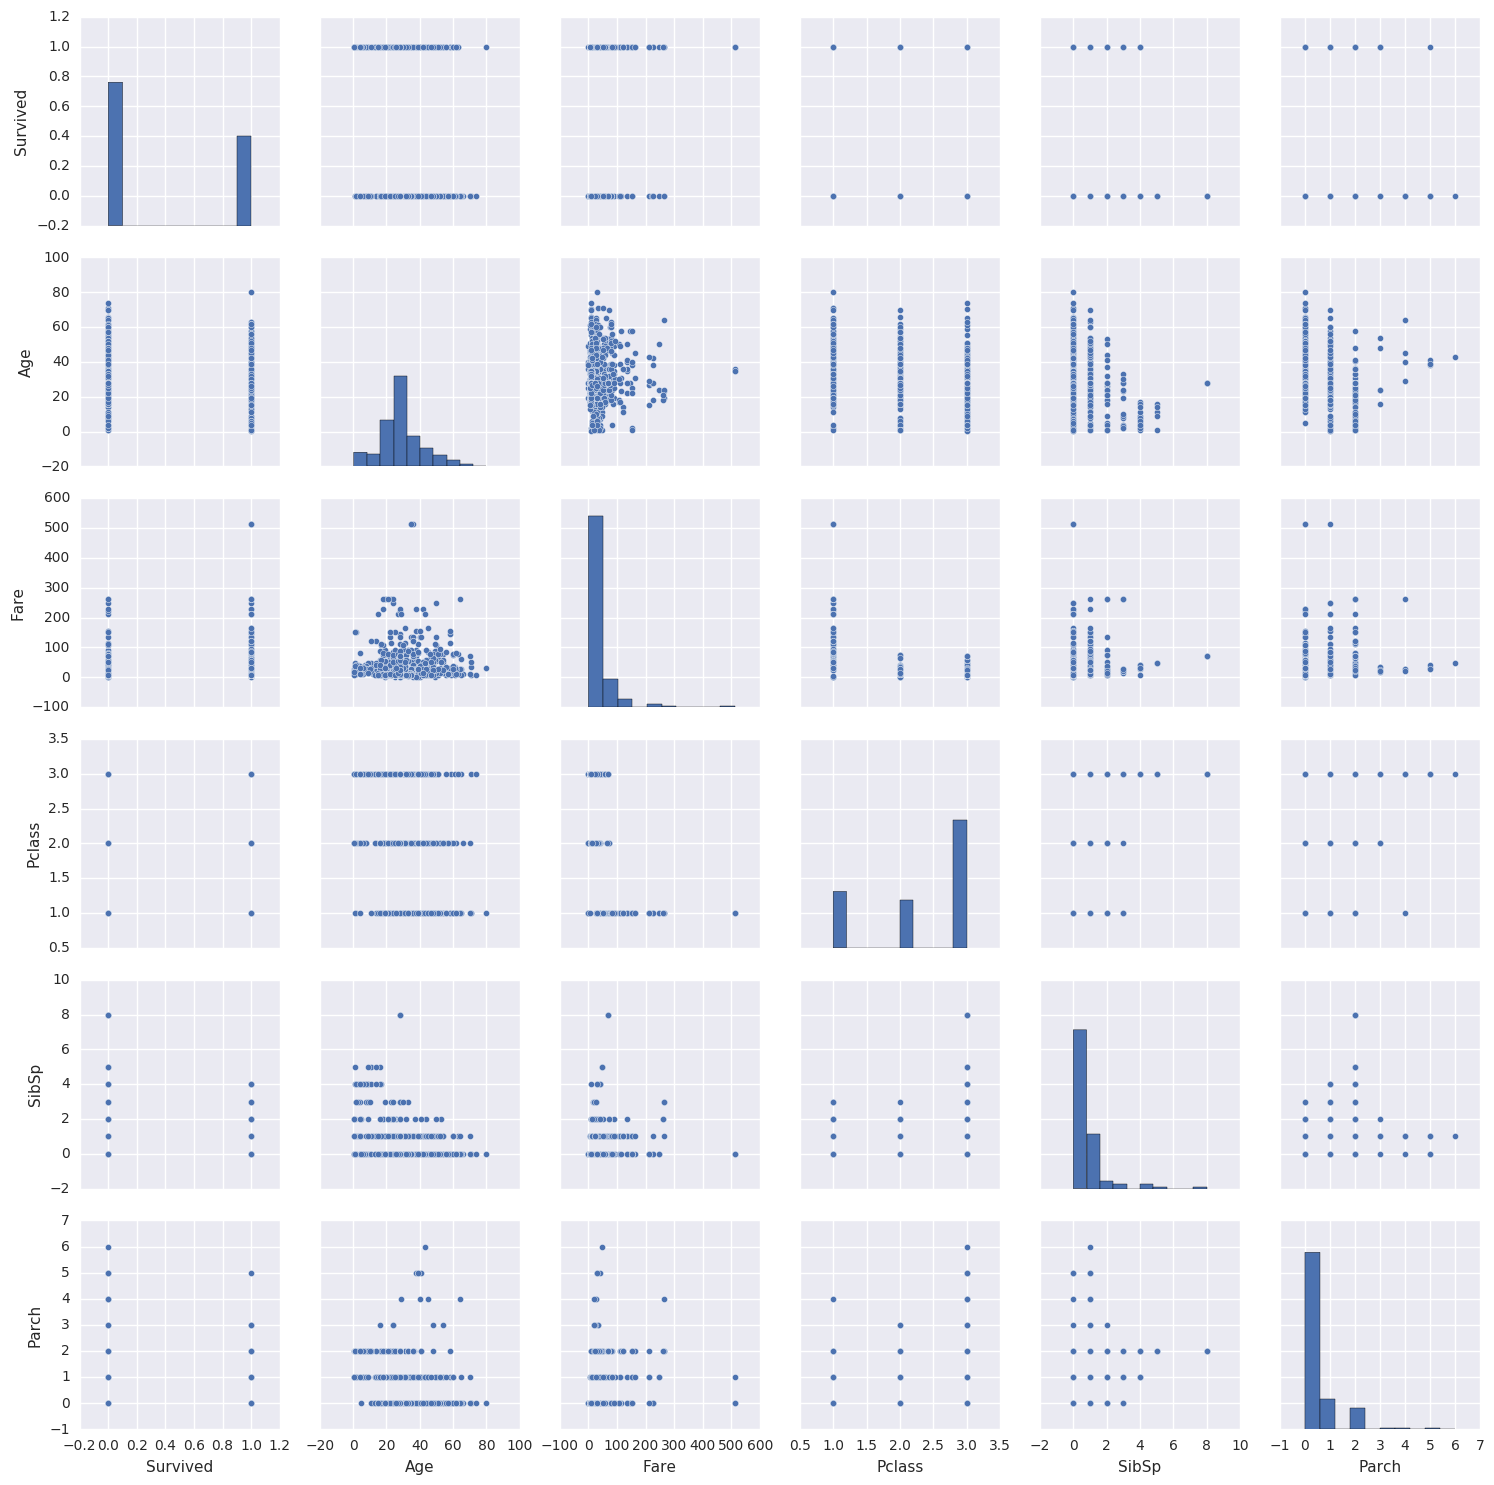

In [6]:
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 
                       'Pclass', 'Sex', 'SibSp', 
                       'Parch', 'Embarked']])

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

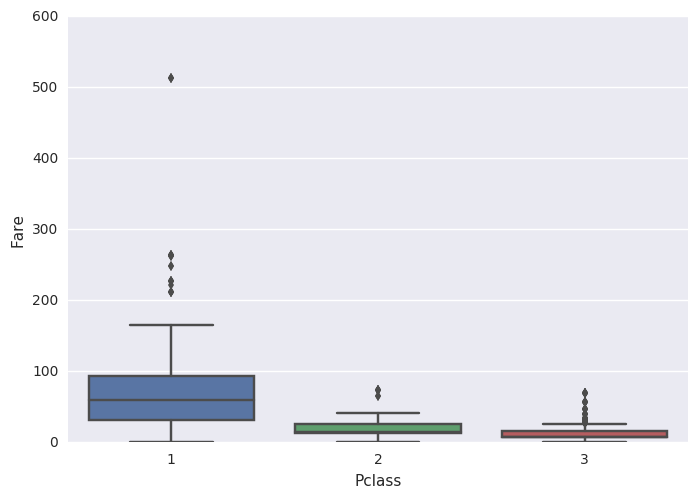

In [7]:
sns.boxplot(x='Pclass', y='Fare', data=train_df)

**Такой boxplot получается не очень красивым из-за выбросов.** 

**Опционально: создайте признак `Fare_no_out` - стоимости без выбросов, в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: Надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

In [8]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = fare_pclass1[(fare_pclass1 - 
                                    fare_pclass1.mean()).abs() 
                                   < 2 * fare_pclass1.std()]
fare_pclass2_no_out = fare_pclass2[(fare_pclass2 
                                    - fare_pclass2.mean()).abs()  
                                   < 2 * fare_pclass2.std()]
fare_pclass3_no_out = fare_pclass3[(fare_pclass3 
                                    - fare_pclass3.mean()).abs()  
                                   < 2 * fare_pclass3.std()]
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out) \
                                            .append(fare_pclass3_no_out)

In [9]:
fare_pclass1.filter?

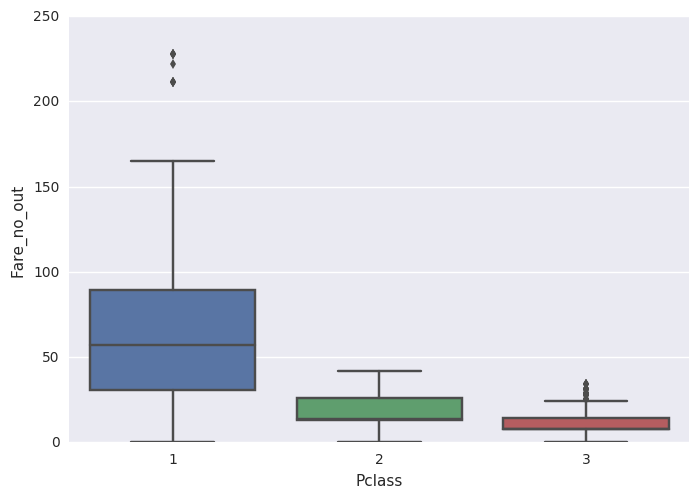

In [10]:
sns.boxplot(x='Pclass', y='Fare_no_out', data=train_df)

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

In [11]:
pd.crosstab(train_df['Sex'], train_df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


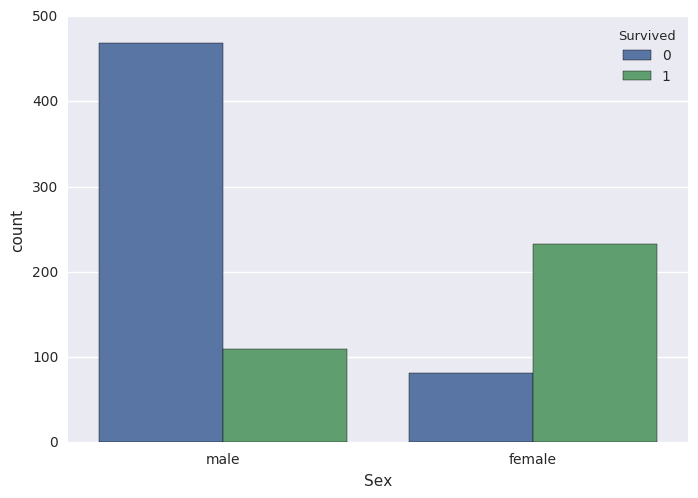

In [12]:
sns.countplot(x="Sex", hue="Survived", data=train_df)

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

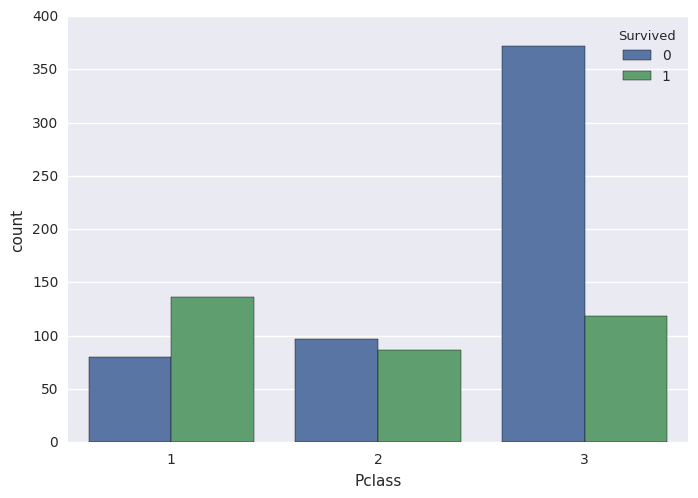

In [13]:
sns.countplot(x="Pclass", hue="Survived", data=train_df)

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали.**

In [14]:
train_df['age_cat'] = train_df['Age'].apply(lambda age: 1 if age < 30 else 
                                           3 if age > 60 else 2)

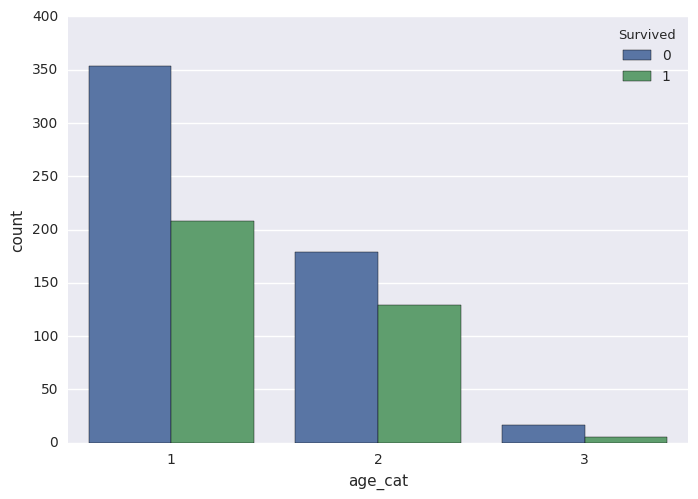

In [15]:
sns.countplot(x='age_cat', hue='Survived', data=train_df)

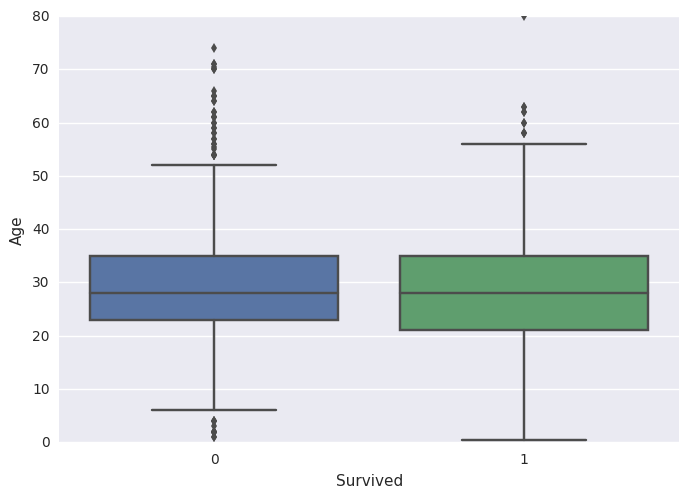

In [16]:
sns.boxplot(x='Survived', y='Age', data=train_df);

In [22]:
train_df = pd.read_csv("../../data/titanic_train.csv", 
                       index_col='PassengerId') 

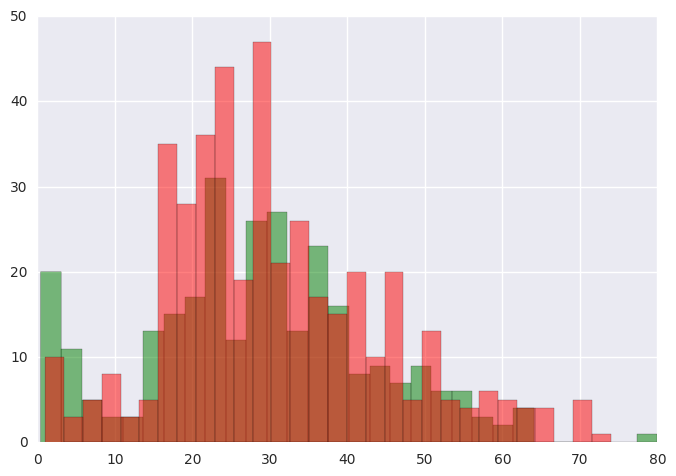

In [23]:
train_df['Age'][train_df['Survived'] == 1].hist(bins=30, color='green',
                                               alpha=0.5);
train_df['Age'][train_df['Survived'] == 0].hist(bins=30, color='red',alpha=0.5);

In [18]:
train_df['Age'].median()

28.0